# Ebay Car Sales - Cleaning Data

The aim of this project is to clean the data and analyze the included used car listings. If possible I would also like to try and write some generic functions to automate some of the cleaning.

We will be working with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website. The original dataset was scraped and posted on Kaggle and had over 300,000 entries. We will be working with a subset of that dataset, sampled and dirtied by the Dataquest.io team.

We are given the following data dicitonary for the dataset:


* dateCrawled - When this ad was first crawled. All field-values are taken from this date.
* name - Name of the car.
* seller - Whether the seller is private or a dealer.
* offerType - The type of listing
* price - The price on the ad to sell the car.
* abtest - Whether the listing is included in an A/B test.
* vehicleType - The vehicle Type.
* yearOfRegistration - The year in which the car was first registered.
* gearbox - The transmission type.
* powerPS - The power of the car in PS.
* model - The car model name.
* kilometer - How many kilometers the car has driven.
* monthOfRegistration - The month in which the car was first registered.
* fuelType - What type of fuel the car uses.
* brand - The brand of the car.
* notRepairedDamage - If the car has a damage which is not yet repaired.
* dateCreated - The date on which the eBay listing was created.
* nrOfPictures - The number of pictures in the ad.
* postalCode - The postal code for the location of the vehicle.
* lastSeenOnline - When the crawler saw this ad last online.

First, lets import some modules and get the dataset.

In [1]:
import pandas as pd
import numpy as np

#a nice module for histograms
import seaborn as sns

autos = pd.read_csv('D:/Library/datasci/datasets/autos.csv', encoding = "Latin-1")

In [2]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


Most of the data types are strings including a few which need to be converted. We have 20 total variables in the dataset and 5 of them have missing values. However, none are missing more than 20% of the values. Finally, the column names are in camelcase instead of snakecase.

#### Rename Columns

First lets rename some of the columns in our dataset using the data dictionary provided and convert them all to snakecase.

In [4]:
columns_copy = autos.columns

clean_cols = [] #initialize empty list

for col in columns_copy:
    col = col.replace("yearOfRegistration", "registration_year")
    col = col.replace('monthOfRegistration', 'registration_month')
    col = col.replace('notRepairedDamage', 'unrepaired_damage')
    col = col.replace('dateCreated', 'ad_created')
    col = col.replace(' ', '_')
    col = col.lower()
    clean_cols.append(col) #append to the empty list once all of this is done
    
autos.columns = clean_cols #update autos dataframe
autos.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,registration_year,gearbox,powerps,model,odometer,registration_month,fueltype,brand,unrepaired_damage,ad_created,nrofpictures,postalcode,lastseen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


We have renamed some of the variables as well as converted all variables to snakecase. Now we can do some basic data exploration.

#### Data Exploration

We are going to look for two things to start:

* Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis.
* Examples of numeric data stored as text which can be cleaned and converted.

This will be nothing fancy here, just using some of the built in methods for pandas.

In [5]:
autos.describe(include = 'all')

,datecrawled,name,seller,offertype,price,abtest,vehicletype,registration_year,gearbox,powerps,model,odometer,registration_month,fueltype,brand,unrepaired_damage,ad_created,nrofpictures,postalcode,lastseen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


We can drop the seller and offertype columns as they are variables with two categories but one of the categories has a frequency of 49999. The other categorical variables look okay. Additionally it seems that the nrofpictures category is 100% zeros and can be dropped as well.

Some variables which could use a closer look are the registration_year and powerps variables as they have maximum values which seem to be nonsensical. 

Additionally, we need to convert price and odometer to numeric values. It also may be worth it to convert postalcode to a string or check the unique values in postalcode and see if there are any strange results. As I am unfamiliar with german postal codes this may be a bit of a stretch. 



In [6]:
autos['registration_year'].value_counts().sort_index()

1000    1
1001    1
1111    1
1500    1
1800    2
       ..
6200    1
8888    1
9000    2
9996    1
9999    4
Name: registration_year, Length: 97, dtype: int64

In [7]:
autos.powerps.value_counts().sort_index()

0        5500
1           5
2           2
3           3
4           4
         ... 
15001       1
15016       1
16011       1
16312       1
17700       1
Name: powerps, Length: 448, dtype: int64

We can see we have many registration years that are impossible. Some may be typos such as 9999 should be 1999, however some such as 6200 there does not seem to be a good explanation. We should keep this in mind.

Additionally, the powerps column stands for PferdStarke which means horsepower in german. So we see that there are also several cars for sale with tens of thousands of horsepower which is also impossible.

For now, lets convert price and odometer to numeric values.

In [8]:
#remove all non-numeric.
autos.odometer = autos.odometer.str.replace(r"\D","", regex = True)
autos.rename(columns = {"odometer":"odometer_km"}, inplace = True)

#the same for price
autos.price = autos.price.str.replace(r"\D","", regex = True)

In [9]:
#convert them to integers
autos.odometer_km = autos.odometer_km.astype(float).round()
autos.price = autos.price.astype(float).round()

autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datecrawled         50000 non-null  object 
 1   name                50000 non-null  object 
 2   seller              50000 non-null  object 
 3   offertype           50000 non-null  object 
 4   price               50000 non-null  float64
 5   abtest              50000 non-null  object 
 6   vehicletype         44905 non-null  object 
 7   registration_year   50000 non-null  int64  
 8   gearbox             47320 non-null  object 
 9   powerps             50000 non-null  int64  
 10  model               47242 non-null  object 
 11  odometer_km         50000 non-null  float64
 12  registration_month  50000 non-null  int64  
 13  fueltype            45518 non-null  object 
 14  brand               50000 non-null  object 
 15  unrepaired_damage   40171 non-null  object 
 16  ad_c

We can go ahead and check these columns for outliers. A somewhat standard approach is to consider values outside of 3 (or 2.5) standard deviations from the mean as outliers and to remove them. Generally, this is tricky as to when it is appropriate to do so if you are intending to do statistical analysis after. However, that isn't the main point of this exercise. But, lets take a look at some basic visualizations.

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

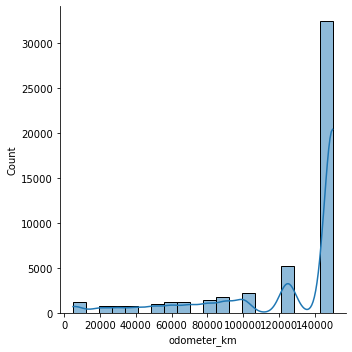

In [10]:
sns.displot(autos["odometer_km"], kind = 'hist', kde = 'True', bins = 20)
autos.odometer_km.describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

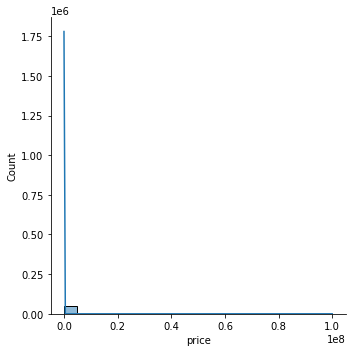

In [11]:
sns.displot(autos["price"], kind = 'hist', kde = 'True', bins = 20)
autos.price.describe()

In [12]:
autos.price.dtype

dtype('float64')

Price seems to definitely have a few outliers, the histogram is a mess. Additionally it seems that the odometer_km variable caps out at about 150k. The minimum value is 5000, which is a reasonable number so I do not think there is anything to trim there.

Lets trim the price.

In [13]:
autos.price.sort_values(ascending=False).head(10)

39705    99999999.0
42221    27322222.0
27371    12345678.0
39377    12345678.0
47598    12345678.0
2897     11111111.0
24384    11111111.0
11137    10000000.0
47634     3890000.0
7814      1300000.0
Name: price, dtype: float64

In [14]:
#remove everything more than 500000 and less than 100.
autos= autos[autos["price"].between(100,50000)]

count    48038.000000
mean      5611.942691
std       6723.459745
min        100.000000
25%       1250.000000
50%       3000.000000
75%       7400.000000
max      50000.000000
Name: price, dtype: float64

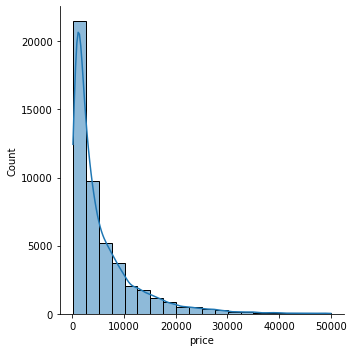

In [15]:
sns.displot(autos["price"], kind = 'hist', kde = 'True', bins = 20)
autos.price.describe()

In [16]:
autos.price.sort_values(ascending=False).tail(2000)

3715     350.0
38171    350.0
18103    350.0
11       350.0
35168    350.0
         ...  
23627    100.0
32543    100.0
22342    100.0
16742    100.0
6750     100.0
Name: price, Length: 2000, dtype: float64

This looks quite a bit better. The curves both seem reasonable, it is possible that some of the cars worth more than 500,000 are real cars selling for that value. I do believe however that without further analysis it is worth it to simplify the dataset by just cutting them.

In [17]:
#unnecessary for this analysis
#sns.displot(np.log(autos["price"]), kind = 'hist', kde = 'True', bins = 20)

There are 5 columns that represent date values. They are date_crawled, last_seen, ad_created, registration_month, registration_year. The first 3 are all identified as string values by pandas. We can take a closer look at these.

In [18]:
autos[['datecrawled','ad_created','lastseen']][0:5]

,datecrawled,ad_created,lastseen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [19]:
autos['datecrawled'].value_counts(normalize = True, dropna = False).sort_index()

2016-03-05 14:06:30    0.000021
2016-03-05 14:06:40    0.000021
2016-03-05 14:07:04    0.000021
2016-03-05 14:07:08    0.000021
2016-03-05 14:07:21    0.000021
                         ...   
2016-04-07 14:30:09    0.000021
2016-04-07 14:30:26    0.000021
2016-04-07 14:36:44    0.000021
2016-04-07 14:36:55    0.000021
2016-04-07 14:36:56    0.000021
Name: datecrawled, Length: 46399, dtype: float64

In [20]:
autos['ad_created'].value_counts(normalize = True, dropna = False).sort_index()

2015-06-11 00:00:00    0.000021
2015-08-10 00:00:00    0.000021
2015-09-09 00:00:00    0.000021
2015-11-10 00:00:00    0.000021
2015-12-05 00:00:00    0.000021
                         ...   
2016-04-03 00:00:00    0.038823
2016-04-04 00:00:00    0.036908
2016-04-05 00:00:00    0.011699
2016-04-06 00:00:00    0.003268
2016-04-07 00:00:00    0.001249
Name: ad_created, Length: 76, dtype: float64

In [21]:
autos['lastseen'].value_counts(normalize = True, dropna = False).sort_index()

2016-03-05 14:45:46    0.000021
2016-03-05 14:46:02    0.000021
2016-03-05 14:49:34    0.000021
2016-03-05 15:16:11    0.000021
2016-03-05 15:16:47    0.000021
                         ...   
2016-04-07 14:58:44    0.000062
2016-04-07 14:58:45    0.000021
2016-04-07 14:58:46    0.000021
2016-04-07 14:58:48    0.000062
2016-04-07 14:58:50    0.000062
Name: lastseen, Length: 38122, dtype: float64

43471    1960
38780    1960
35092    1960
29143    1960
25526    1960
29950    1960
49722    1960
9620     1959
23854    1959
13366    1959
20471    1959
34541    1959
24291    1959
10358    1958
20105    1958
28565    1958
23044    1957
40077    1957
19914    1956
23483    1956
26570    1956
7294     1956
40765    1954
25556    1954
35453    1953
23372    1952
35921    1951
14020    1950
11047    1948
11585    1943
13963    1941
25792    1941
24855    1939
26103    1938
26607    1937
39725    1937
21421    1937
23804    1937
2221     1934
2573     1934
11246    1931
22101    1929
21416    1927
22659    1910
28693    1910
10556    1800
32585    1800
24511    1111
49283    1001
22316    1000
Name: registration_year, dtype: int64

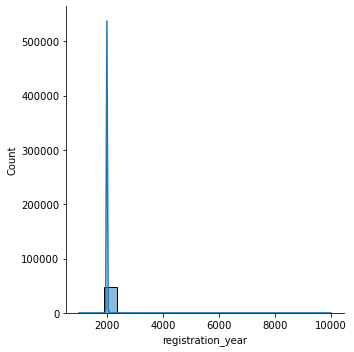

In [22]:
sns.displot(autos["registration_year"], kind = 'hist', kde = 'True', bins = 20)
autos.registration_year.describe()
autos.registration_year.sort_values(ascending = False).tail(50)

The crawler apparently was running for about a month starting in march 2016. We get about a years worth of ads from 2015 to 2016 captured in that time. Additionally, the registration_year column needs some trimming. Everything past 2016 can be cut and everything before 1900 I would say can be cut. From a quick googling it looks like car registration in germany began somewhere in the early 1900s.

In [25]:
autos = autos[autos['registration_year'].between(1900,2016, inclusive = 'both')]

count    46168.000000
mean      2002.930406
std          7.082211
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

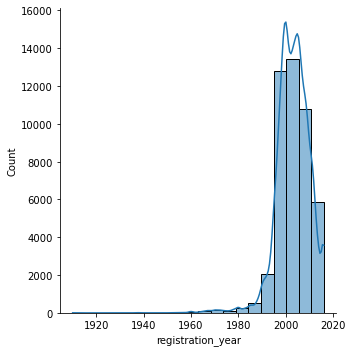

In [26]:
sns.displot(autos["registration_year"], kind = 'hist', kde = 'True', bins = 20)
autos.registration_year.describe()

In [27]:
autos.registration_year.describe()

count    46168.000000
mean      2002.930406
std          7.082211
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: registration_year, dtype: float64

This seems like a very reasonable histogram.

#### Aggregation

Lets print out some frequency tables where we capture mean price by brand.

In [38]:
autos.brand.value_counts().head(20)

volkswagen        9797
bmw               5093
opel              4971
mercedes_benz     4450
audi              4000
ford              3231
renault           2181
peugeot           1384
fiat              1187
seat               846
skoda              761
nissan             711
mazda              706
smart              658
citroen            651
toyota             593
hyundai            464
sonstige_autos     428
volvo              423
mini               408
Name: brand, dtype: int64

In [41]:
#This will grab the top 20 most popular car brands.
top_20 = autos.brand.value_counts().head(20).index.tolist()
print(top_20)

['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault', 'peugeot', 'fiat', 'seat', 'skoda', 'nissan', 'mazda', 'smart', 'citroen', 'toyota', 'hyundai', 'sonstige_autos', 'volvo', 'mini']


In [78]:
#group by brand and price. Print median and mean, round to get rid of cents. Then select the top 20 most popular cars
#and sort by mean.
autos.groupby('brand')['price'].agg(["mean","median"]).round().loc[top_20,:].sort_values(["mean"],ascending = False)

,mean,median
brand,,
mini,10639.0,9100.0
sonstige_autos,9764.0,6733.0
audi,9068.0,6300.0
mercedes_benz,8234.0,5100.0
bmw,8142.0,5950.0
skoda,6410.0,4999.0
volkswagen,5425.0,3000.0
hyundai,5411.0,4200.0
toyota,5167.0,4000.0


The above table is the result of the top 20 most popular cars by count on German ebay car sales. I have then gone and calculated the mean and median price of the vehicles and sorted them by the mean. The prices seem to have means greater than medians for the most part which indicates a right skewed dataset. We also created a histogram of prices earlier which was clearly right skewed. Mini seems to be the most expensive popular brand then many common german luxury vehicles. 

This does seem within expectations. However, mileage (kilometerage?) can be very important for someone considering purchasing a used vehicle. We can see if there is a relationship between mileage, brand and price.

In [92]:
def aggregate(df, cat, num1, num2):
    a = df.groupby([cat])[num1].mean().round().loc[top_20]
    b = df.groupby([cat])[num2].mean().round().loc[top_20]
    return(pd.concat([a,b], axis = 1, keys = [num1, num2]))

chart = aggregate(autos, 'brand','price','odometer_km')

In [95]:
chart.sort_values('price', ascending = False)

,price,odometer_km
brand,,
mini,10639.0,88309.0
sonstige_autos,9764.0,92068.0
audi,9068.0,129780.0
mercedes_benz,8234.0,131525.0
bmw,8142.0,132953.0
skoda,6410.0,110907.0
volkswagen,5425.0,128824.0
hyundai,5411.0,106886.0
toyota,5167.0,115944.0


We see that mini and sonstige_autos brands have significantly lower values for their odometer_km categories. These brands are represented at about 1/10th of the number of the most popular german brands: volkswagon, bmw, audi, mercedes_benz. There could be a variety of reasons why we see these relationships whether it is from popularity, them being more 'prized' and less of a daily driver, or reliability (or lack thereof).

Some steps for further analysis if desired:
* Data cleaning next steps:
    * Identify categorical data that uses german words, translate them and map the values to their english counterparts
    * Convert the dates to be uniform numeric data, so "2016-03-21" becomes the integer 20160321.
    * See if there are particular keywords in the name column that you can extract as new columns
* Analysis next steps:
    * Find the most common brand/model combinations
    * Split the odometer_km into groups, and use aggregation to see if average prices follows any patterns based on the mileage.
    * How much cheaper are cars with damage than their non-damaged counterparts?